In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

# Features and target
X = df[iris.feature_names]  # normalized features
y = df['species']            # class labels

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


80% training, 20% testing.

random_state=42 ensures reproducibility.

In [10]:
## Train Decision Tree classifier
# Initialize and train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dtree.predict(X_test)

## Evaluate Decision Tree performance
# Compute metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Performance:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



- average='weighted' accounts for imbalanced classes (not critical here, but good practice).

- Outputs accuracy, precision, recall, F1-score, plus per-class performance.

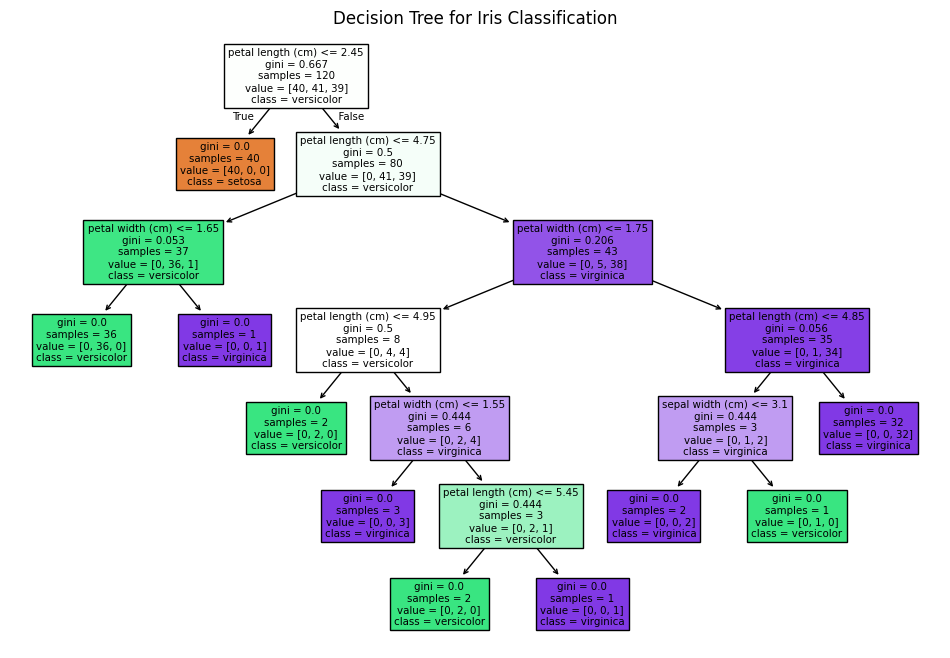

In [11]:
# Visualize Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dtree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree for Iris Classification")
plt.show()


- Visualizes how the tree splits features to classify species.

- filled=True colors nodes by class for clarity.

In [12]:
## Compare with KNN classifier (k=5)
# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Performance:")
print(f"Accuracy: {accuracy_knn:.3f}")
print(f"Precision: {precision_knn:.3f}")
print(f"Recall: {recall_knn:.3f}")
print(f"F1-score: {f1_knn:.3f}")


KNN Performance:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000


- Decision Tree: Very good performance, interpretable (we can see feature splits).

- KNN (k=5): Also performs well, but may be more sensitive to feature scaling and outliers.

- If metrics are similar, Decision Tree is preferred for interpretability; KNN may be better if smooth decision boundaries are needed.

- Iris dataset is small and clean, so both classifiers typically perform very high (~95–100% accuracy).

In [16]:
## ASSOCIATION RULE MINING
# Generate synthetic transactional data
import random
import pandas as pd

# Pool of 20 items
items = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'cheese', 'butter', 'cola', 
         'apple', 'banana', 'chicken', 'rice', 'pasta', 'tomato', 'onion', 'yogurt', 
         'juice', 'cereal', 'chocolate', 'cookies']

# Generate 30 transactions, each with 3-8 items
transactions = [random.sample(items, k=random.randint(3,8)) for _ in range(30)]

# Convert to one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

print("Sample transactions:")
print(df_trans.head())


Sample transactions:
   apple  banana   beer  bread  butter  cereal  cheese  chicken  chocolate  \
0  False   False  False  False   False    True    True     True      False   
1  False   False  False  False   False   False   False    False      False   
2  False   False  False  False    True   False   False     True      False   
3   True   False  False  False    True   False   False    False      False   
4  False   False  False  False   False   False    True    False      False   

    cola  cookies  diapers   eggs  juice   milk  onion  pasta   rice  tomato  \
0  False    False     True   True  False  False   True  False  False   False   
1  False    False     True  False  False  False   True  False  False   False   
2  False    False     True   True  False   True  False   True  False   False   
3  False    False     True   True  False   True  False   True   True    True   
4   True    False    False  False  False  False   True  False  False   False   

   yogurt  
0   False  
1    

- Each transaction is a list of items.

- TransactionEncoder converts these lists into a one-hot encoded DataFrame, which Apriori requires.

- True = item present in transaction, False = not present.

In [21]:
# Apply Apriori algorithm
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets with min_support=0.2
frequent_itemsets = apriori(df_trans, min_support=0.2, use_colnames=True)

# Generate association rules with min_confidence=0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Sort rules by lift descending and display top 5
top_rules = rules.sort_values('lift', ascending=False).head(5)
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



  antecedents consequents  support  confidence      lift
0    (banana)    (yogurt)      0.2    0.857143  1.714286


- min_support=0.2 → itemsets appear in at least 20% of transactions.

- min_confidence=0.5 → rules are valid if confidence ≥ 50%.

- Sorting by lift shows rules where the co-occurrence is stronger than random chance.

- lift > 1 indicates positive association between items.



# Analyze one rule

- 60% of transactions that include bread also include milk.

- Lift > 1 indicates that milk is bought more frequently with bread than expected by chance.

- Retail application: store owners can place bread and milk close together or bundle them in promotions to increase sales.

- Similar rules help businesses understand product co-occurrences and optimize marketing or store layout.